In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)
import seaborn as sns
import plotly.express as px
import clean

### Read in the data

In [2]:
raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0 )
raw.reset_index(inplace=True)

In [3]:
raw.head()

,index,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


### Test Train Split

In [4]:
from sklearn.model_selection import train_test_split

X = raw.drop('SalePrice', axis=1)
y = raw.SalePrice

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=7)

### Clean the data and deal with missingness
- see clean1.py for details
- turned quality and condition features into ordinal

In [5]:
Xtrain = clean.clean_missing(Xtrain.copy())
Xtest = clean.clean_missing(Xtest.copy())

### Removing outliers in GrLivArea (2 data points > 5 std ~3936)

In [6]:
threshold = (np.mean(Xtrain.GrLivArea) + 5*np.std(Xtrain.GrLivArea))
idx = Xtrain[Xtrain.GrLivArea > threshold].index
Xtrain.drop(idx, inplace=True)
ytrain.drop(idx, inplace=True)
Xtrain.drop('index', axis=1, inplace=True)

In [7]:
Xtrain.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


### EDA


In [8]:
data_c1 = pd.concat([ytrain, Xtrain], axis=1)

In [9]:
data_c1.head()

,SalePrice,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,84900,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,181500,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,159950,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,322500,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,200000,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


### Look at SalePrice

((array([-3.40067672, -3.15019379, -3.01129237, ...,  3.01129237,
          3.15019379,  3.40067672]),
  array([ 34900,  35000,  35311, ..., 610000, 615000, 625000])),
 (69227.08356369549, 178026.2725509214, 0.9452641123321593))

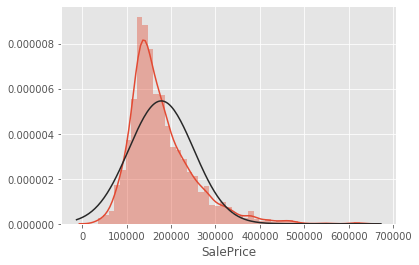

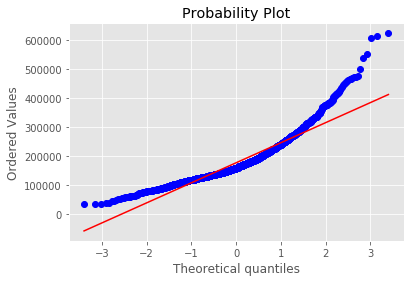

In [11]:
# The original SalePrice is not normally distributed 
import seaborn as sns
from scipy import stats
from scipy.stats import norm
sns.distplot(data_c1.SalePrice, fit = norm)
fig = plt.figure()
stats.probplot(data_c1.SalePrice, plot=plt)

### Log-transformed histogram and normal probability plot for SalePrice -- looks normal 

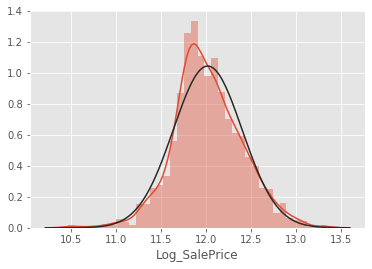

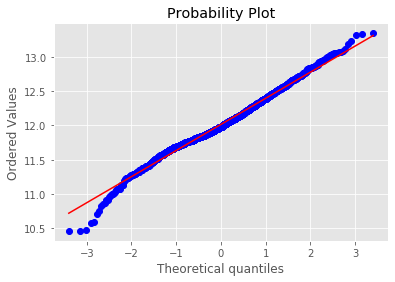

In [12]:
data_c2 = data_c1.copy()
data_c2['Log_SalePrice'] = np.log(data_c2['SalePrice'])
sns.distplot(data_c2['Log_SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_c2['Log_SalePrice'], plot=plt)

In [13]:
ytrainlog = np.log(ytrain)
ytestlog = np.log(ytest)

### Look at the quality against log(SalePrice)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


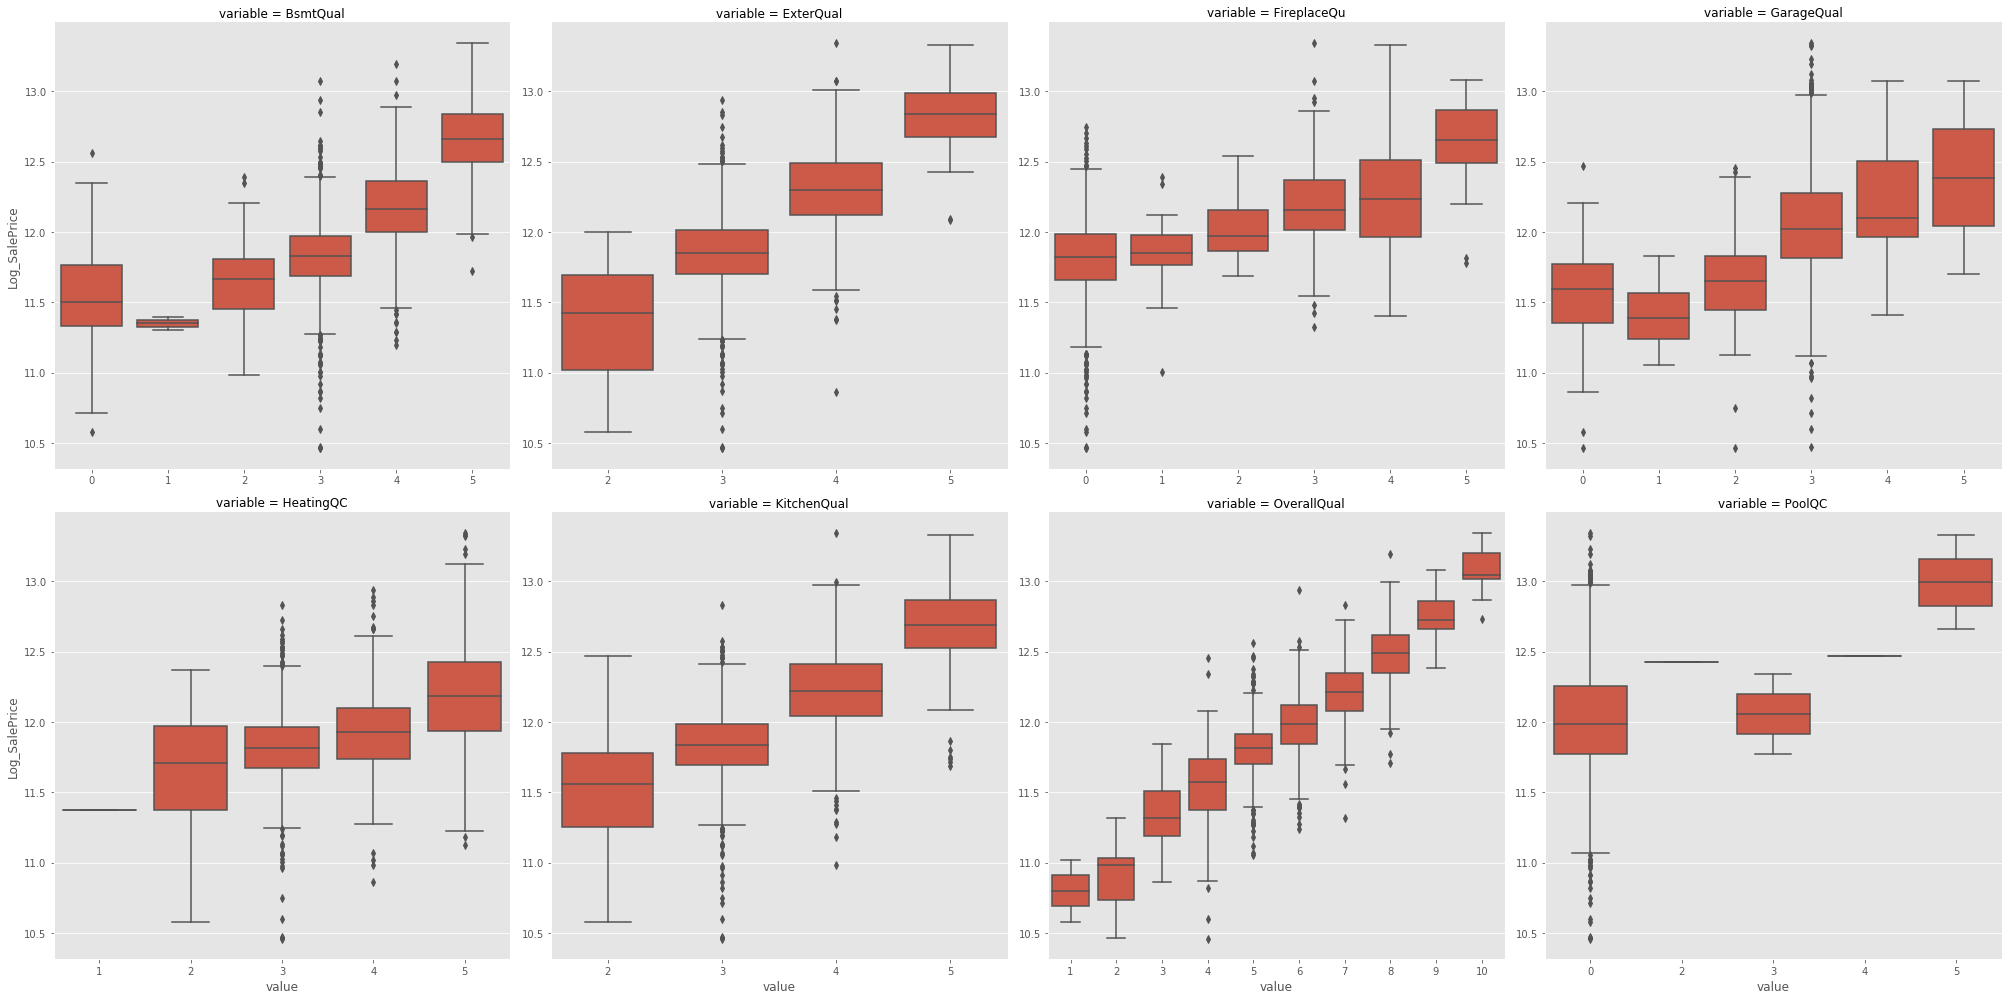

In [14]:
quality_related = data_c2.filter(regex='Qual$|QC$|Qu$')

f = pd.melt(data_c2, id_vars=['Log_SalePrice'], value_vars=sorted(quality_related.columns))
g = sns.FacetGrid(f, col = 'variable', col_wrap=4, sharex=False, sharey = False, height=7)
g = g.map(sns.boxplot, 'value', 'Log_SalePrice')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8791a22750>,
      dtype=object)

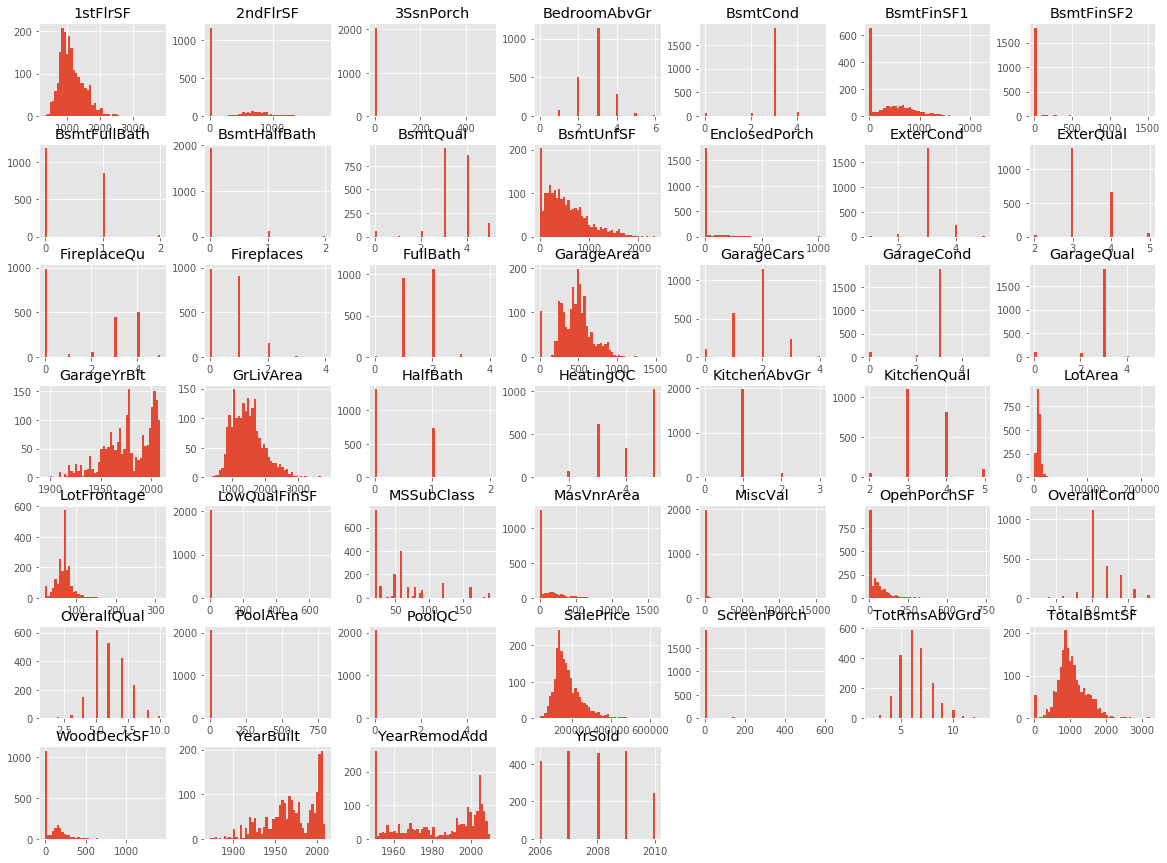

In [15]:
data_c1.hist(bins=50, figsize=(20,15))

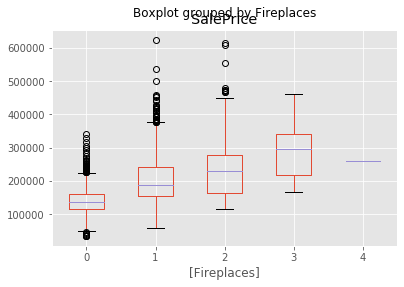

In [16]:
data_c1[['SalePrice', 'Fireplaces']].boxplot(by = 'Fireplaces')

In [17]:
data_c1.Fireplaces.value_counts()

0    988
1    910
2    157
3      6
4      1
Name: Fireplaces, dtype: int64

### Feature Selection and Generation
- look at the neighborhood average price/sqft

<Figure size 1080x1080 with 0 Axes>

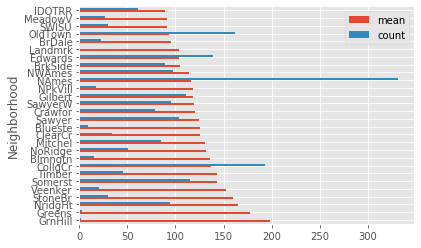

In [18]:
data_c2['PriceSqft'] = data_c2.SalePrice / data_c2.GrLivArea
test1=data_c2.groupby("Neighborhood").agg(['mean', 'count'])['PriceSqft'].sort_values(by='mean', ascending=False)
plt.figure(figsize=(15,15))
test1.plot.barh()

#### Just another set of plots that splits the above
- Will separate neighborhood by sections below in clean.py : Tier_1, Tier_2, Tier_3 where Tier_3 is the group of neighborhoods with lowest mean price/sqft

In [20]:
test2= test1.reset_index()

In [64]:
import plotly.express as px
fig = px.bar(test2, x="mean", y = 'Neighborhood')
fig2 = px.bar(test2, x="count", y = 'Neighborhood')
fig.show()
fig2.show()

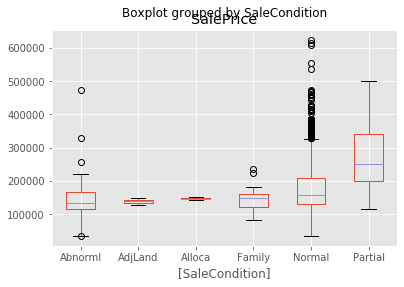

In [22]:
data_c1[['SalePrice', 'SaleCondition']].boxplot(by = 'SaleCondition')

In [23]:
# Will reduce to binary Partial Sale vs rest - see clean1.py
data_c1.SaleCondition.value_counts()

Normal     1935
Partial      57
Abnorml      52
Family       14
AdjLand       2
Alloca        2
Name: SaleCondition, dtype: int64

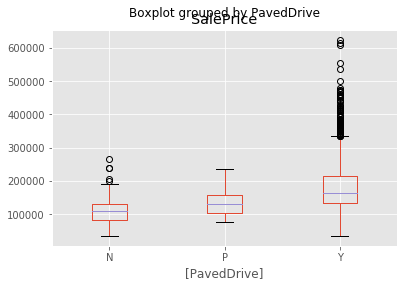

In [24]:
data_c1[['SalePrice', 'PavedDrive']].boxplot(by = 'PavedDrive')

In [25]:
# will group N(not paved) and P(partial) together and have binary paved or not feature
data_c1.PavedDrive.value_counts()

Y    1879
N     140
P      43
Name: PavedDrive, dtype: int64

- Create feature TotalBath to add all half and full baths together
- Change YrBuilt YrSold and YrRemodAdd to HouseAge and RemodelAge
- Create HasDeck feature from WoodDeckSF feature
- Create Has Porch feature by adding all porch columns

In [26]:
def cat_num_group(df):
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = cat_num_group(data_c1)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



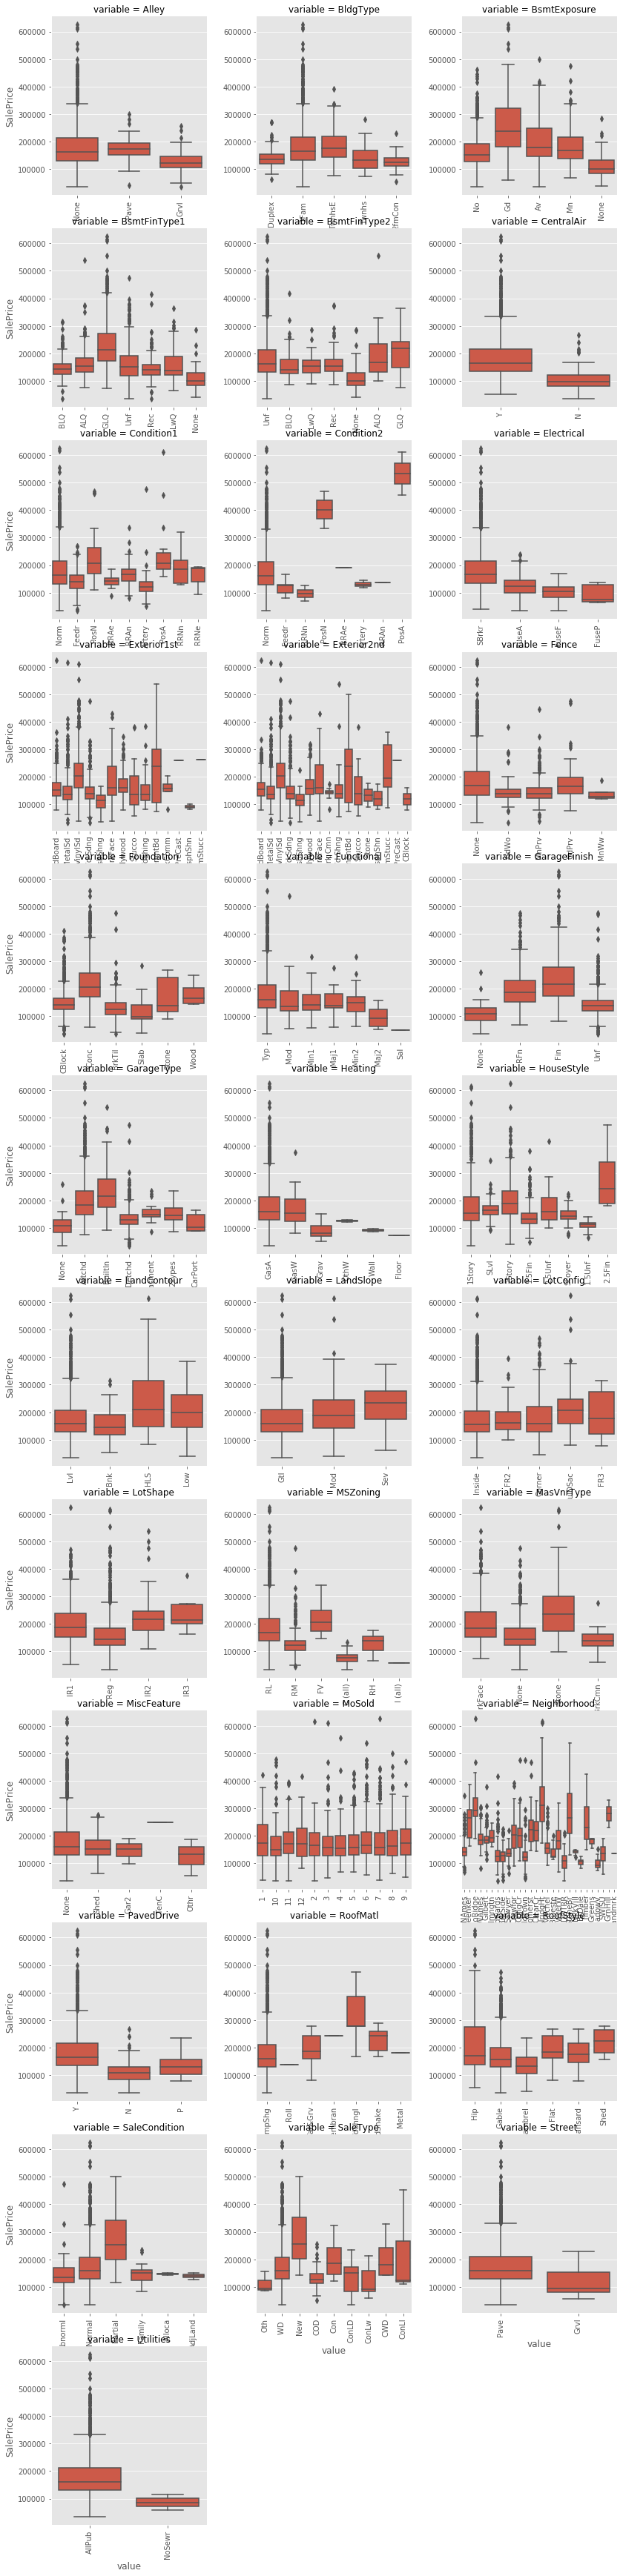

In [27]:
# Used these boxplots to group some categorical values by eye
f = pd.melt(data_c1, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

### Second round of cleaning including feature engineering

In [28]:
Xtrain = clean.clean_category_var(Xtrain.copy())
Xtest = clean.clean_category_var(Xtest.copy())

In [29]:
Xtrain.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,MiscVal,1st2ndlogSF,HouseAge,RemodelAge,HasPool,HasFence,HasPorch,TotalBath,PartialSale
997,1,98.00000,13260,2,1,Tier_3,2,3,1,BrkFace,144.0,3,2,3,3,3,1728.0,3,Y,1,6,2,3,10,1,0,0,2,2,0.0,0.0,0,1,0,0,7.454720,48,9,0,0,0,4.0,0
381,1,80.00000,9600,1,1,Tier_1,2,1,1,None,0.0,3,2,4,1,3,1262.0,5,Y,1,3,1,3,6,1,1,3,1,2,2.0,460.0,3,1,298,0,7.140453,31,31,0,0,0,2.5,0
1077,1,85.00000,13400,1,1,Tier_3,2,1,3,BrkFace,1047.0,3,2,3,3,3,1024.0,3,Y,1,3,1,3,6,1,1,4,1,2,2.0,484.0,3,1,0,0,6.990257,40,40,0,1,0,2.0,0
416,1,74.00000,11002,2,1,Tier_2,2,1,2,None,0.0,4,1,4,3,1,1389.0,5,Y,1,4,1,4,9,1,1,3,1,1,3.0,758.0,3,1,286,0,7.856320,9,8,0,0,1,3.5,0
1377,1,68.62847,22002,1,1,Tier_3,2,1,1,BrkFace,136.0,3,2,3,3,3,1592.0,4,Y,1,3,1,4,6,1,1,4,1,2,2.0,510.0,3,1,0,0,7.409742,48,16,0,0,1,2.5,0


### Write csv to do stepwise BIC in R

In [30]:
rdata1 = pd.concat([Xtrain, ytrainlog], axis=1)

In [31]:
#rdata1.to_csv("./data/rdata1.csv",index_label = False)

In [32]:
rdata1.shape

(2062, 44)

### Dummify the categorical Variables

In [33]:
Xtrain_d = pd.get_dummies(Xtrain, drop_first=True)
Xtest_d = pd.get_dummies(Xtest, drop_first=True)

In [34]:
Xtrain_d.head()

,LotFrontage,LotArea,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,MiscVal,1st2ndlogSF,HouseAge,RemodelAge,HasPool,HasFence,HasPorch,TotalBath,PartialSale,MSZoning_2,LotShape_2,LandSlope_2,Neighborhood_Tier_2,Neighborhood_Tier_3,Condition1_2,BldgType_2,BldgType_3,HouseStyle_2,HouseStyle_3,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_2,BsmtExposure_2,BsmtExposure_3,BsmtFinType1_2,BsmtFinType1_3,CentralAir_Y,Electrical_2,Functional_2,GarageType_2,GarageFinish_2
997,98.00000,13260,144.0,3,3,1728.0,3,6,2,3,10,0,0,0.0,0.0,0,1,0,0,7.454720,48,9,0,0,0,4.0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1
381,80.00000,9600,0.0,3,4,1262.0,5,3,1,3,6,1,3,2.0,460.0,3,1,298,0,7.140453,31,31,0,0,0,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1
1077,85.00000,13400,1047.0,3,3,1024.0,3,3,1,3,6,1,4,2.0,484.0,3,1,0,0,6.990257,40,40,0,1,0,2.0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1
416,74.00000,11002,0.0,4,4,1389.0,5,4,1,4,9,1,3,3.0,758.0,3,1,286,0,7.856320,9,8,0,0,1,3.5,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1377,68.62847,22002,136.0,3,3,1592.0,4,3,1,4,6,1,4,2.0,510.0,3,1,0,0,7.409742,48,16,0,0,1,2.5,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1


### Lasso for feature selection to compare

In [35]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(normalize=True)

In [36]:
# Grid search to get best alpha
from sklearn.model_selection import GridSearchCV
grid_param = [{'alpha': list(np.linspace(1e-4, 100, 100))}] # key of dictionary is parameter, value is range of values of hyperparameter
grid = GridSearchCV(estimator=lasso1, param_grid=grid_param, cv=5, return_train_score=True,)
grid.fit(Xtrain_d, ytrainlog)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 1.0102, 2.0203, 3.0304, 4.0405,
                                    5.050599999999999, 6.0607, 7.0708, 8.0809,
                                    9.091, 10.101099999999999, 11.1112, 12.1213,
                                    13.1314, 14.1415, 15.1516, 16.1617, 17.1718,
                                    18.1819, 19.192, 20.202099999999998,
                                    21.2122, 22.2223, 23.2324, 24.2425, 25.2526,
                                    26.2627, 27.2728, 28.2829, 29.293, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


In [37]:
grid.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
lasso2 = Lasso(normalize=True, alpha=0.0001)
lasso2.fit(Xtrain_d, ytrainlog) # fit data

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Plot Lasso coeficients

Text(0.5, 1.0, 'Feature importance using Lasso Model')

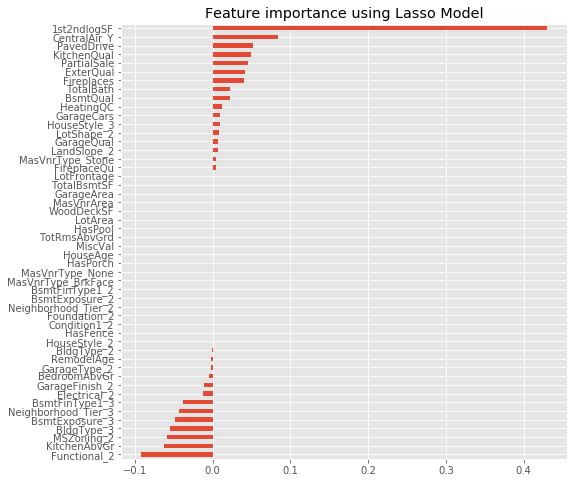

In [39]:
coef = pd.Series(lasso2.coef_, index = Xtrain_d.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Using Both Forward BIC and Lasso make most interpretable model

In [40]:
# Chosen 
column_names = ['ExterQual','BsmtQual','KitchenQual',
                'Fireplaces','GarageQual','PavedDrive','TotalBath',
                'PartialSale','TotalBsmtSF','1st2ndlogSF','GarageArea','WoodDeckSF']
Xtrain_m = Xtrain_d[column_names].copy()
Xtest_m = Xtest_d[column_names].copy()

In [41]:
import statsmodels.api as sm
x_m = sm.add_constant(Xtrain_m)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(ytrainlog, x_m)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1020.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:23:52   Log-Likelihood:                 1057.4
No. Observations:                2062   AIC:                            -2089.
Df Residuals:                    2049   BIC:                            -2016.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.9166      0.096     82.263      

### Cross Validate and check the train - test scores

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain_m, ytrainlog)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
from sklearn.model_selection import cross_val_score
cv3_train=(cross_val_score(lm, Xtrain_m, ytrainlog))

In [44]:
cv3_train

array([0.85891496, 0.81288513, 0.86638196, 0.86153606, 0.8648379 ])

In [45]:
print(f'Mean CV Score: {np.mean(cv3_train)}')
print(f'CV Score Std: {np.std(cv3_train)}')

Mean CV Score: 0.8529112012597919
CV Score Std: 0.020180322975710558


In [46]:
lm.score(Xtrain_m, ytrainlog)

0.85655722272963

In [47]:
lm.score(Xtest_m, ytestlog)

0.8221858145013445

### Look at the coefficients

In [48]:
pd.Series(lm.coef_ ,index = Xtrain_m.columns).sort_values(ascending =False)

1st2ndlogSF    0.378522
PavedDrive     0.113658
ExterQual      0.092561
KitchenQual    0.092210
PartialSale    0.077431
Fireplaces     0.071786
TotalBath      0.047483
BsmtQual       0.043430
GarageQual     0.018951
GarageArea     0.000229
TotalBsmtSF    0.000143
WoodDeckSF     0.000114
dtype: float64

### Profit/Cost for Renovation Graphs

In [49]:
pc = pd.read_csv('data/pc_renovation.csv')
pc

,Feature,Coef,RenCost,Notes
0,Basement Total Renovation,0.043430,18.395,Average cost renovate basement
1,Basement Partial Renovation,0.043430,4.610,Average cost of just installing flooring and c...
2,Kitchen Total Renovation,0.092210,12.200,Average cost hire designer (not remodel)
3,Kitchen Partial Renovation,0.092210,6.215,Average cost installing countertops and flooring
4,Add Fireplace,0.071786,2.331,Average cost to build a fireplace
5,Garage Ren,0.018951,12.800,Average cost to convert or renovate garage
6,Pave Driveway,0.113658,4.620,Average cost paving driveway.
7,Add Bathroom,0.047483,15.000,Average cost to build a bathroom


In [50]:
pc['ProfitCost'] = pc['Coef']/pc['RenCost']

In [51]:
pc

,Feature,Coef,RenCost,Notes,ProfitCost
0,Basement Total Renovation,0.043430,18.395,Average cost renovate basement,0.002361
1,Basement Partial Renovation,0.043430,4.610,Average cost of just installing flooring and c...,0.009421
2,Kitchen Total Renovation,0.092210,12.200,Average cost hire designer (not remodel),0.007558
3,Kitchen Partial Renovation,0.092210,6.215,Average cost installing countertops and flooring,0.014837
4,Add Fireplace,0.071786,2.331,Average cost to build a fireplace,0.030796
5,Garage Ren,0.018951,12.800,Average cost to convert or renovate garage,0.001481
6,Pave Driveway,0.113658,4.620,Average cost paving driveway.,0.024601
7,Add Bathroom,0.047483,15.000,Average cost to build a bathroom,0.003166


In [52]:
import plotly.express as px
fig = px.scatter(pc, x="Coef", y="RenCost",
                 text='Feature', 
                 size = 'ProfitCost',
                 labels={
                    'Coef': 'Increase in log House Price',
                    'RenCost': 'Renovation Costs in Thousands',
                    'ProfitCost': 'Profit Cost Ratio'
                    
                })
fig.update_traces(textposition='top center')
fig.update_layout(
    title={
        'text': 'Renovation Costs vs House Price Gain',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [53]:
fig = px.bar(pc, x="Feature", y='ProfitCost',
            labels = {
                'Feature': 'Type of Renovation',
                'ProfitCost': 'Profit Cost Ratio'
            })

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Add Fireplace','Pave Driveway',
                                                                   'Kitchen Partial Renovation',
                                                                   'Basement Partial Renovation',
                                                                   'Kitchen Total Renovation',
                                                                   'Add Bathroom','Basement Total Renovation']})
fig.update_layout(
    title={
        'text': "Renovation Return on Investment",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [54]:
### Sensitivity related 
Xtrain.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,MiscVal,1st2ndlogSF,HouseAge,RemodelAge,HasPool,HasFence,HasPorch,TotalBath,PartialSale
997,1,98.00000,13260,2,1,Tier_3,2,3,1,BrkFace,144.0,3,2,3,3,3,1728.0,3,Y,1,6,2,3,10,1,0,0,2,2,0.0,0.0,0,1,0,0,7.454720,48,9,0,0,0,4.0,0
381,1,80.00000,9600,1,1,Tier_1,2,1,1,None,0.0,3,2,4,1,3,1262.0,5,Y,1,3,1,3,6,1,1,3,1,2,2.0,460.0,3,1,298,0,7.140453,31,31,0,0,0,2.5,0
1077,1,85.00000,13400,1,1,Tier_3,2,1,3,BrkFace,1047.0,3,2,3,3,3,1024.0,3,Y,1,3,1,3,6,1,1,4,1,2,2.0,484.0,3,1,0,0,6.990257,40,40,0,1,0,2.0,0
416,1,74.00000,11002,2,1,Tier_2,2,1,2,None,0.0,4,1,4,3,1,1389.0,5,Y,1,4,1,4,9,1,1,3,1,1,3.0,758.0,3,1,286,0,7.856320,9,8,0,0,1,3.5,0
1377,1,68.62847,22002,1,1,Tier_3,2,1,1,BrkFace,136.0,3,2,3,3,3,1592.0,4,Y,1,3,1,4,6,1,1,4,1,2,2.0,510.0,3,1,0,0,7.409742,48,16,0,0,1,2.5,0


In [55]:
rdata1 = pd.concat([Xtrain, ytrainlog], axis=1)

In [56]:
data = pd.concat([Xtrain, ytrainlog], axis=1)

In [57]:
data.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,MiscVal,1st2ndlogSF,HouseAge,RemodelAge,HasPool,HasFence,HasPorch,TotalBath,PartialSale,SalePrice
997,1,98.00000,13260,2,1,Tier_3,2,3,1,BrkFace,144.0,3,2,3,3,3,1728.0,3,Y,1,6,2,3,10,1,0,0,2,2,0.0,0.0,0,1,0,0,7.454720,48,9,0,0,0,4.0,0,11.349229
381,1,80.00000,9600,1,1,Tier_1,2,1,1,None,0.0,3,2,4,1,3,1262.0,5,Y,1,3,1,3,6,1,1,3,1,2,2.0,460.0,3,1,298,0,7.140453,31,31,0,0,0,2.5,0,12.109011
1077,1,85.00000,13400,1,1,Tier_3,2,1,3,BrkFace,1047.0,3,2,3,3,3,1024.0,3,Y,1,3,1,3,6,1,1,4,1,2,2.0,484.0,3,1,0,0,6.990257,40,40,0,1,0,2.0,0,11.982617
416,1,74.00000,11002,2,1,Tier_2,2,1,2,None,0.0,4,1,4,3,1,1389.0,5,Y,1,4,1,4,9,1,1,3,1,1,3.0,758.0,3,1,286,0,7.856320,9,8,0,0,1,3.5,0,12.683858
1377,1,68.62847,22002,1,1,Tier_3,2,1,1,BrkFace,136.0,3,2,3,3,3,1592.0,4,Y,1,3,1,4,6,1,1,4,1,2,2.0,510.0,3,1,0,0,7.409742,48,16,0,0,1,2.5,0,12.206073


### Exploration of Sensitivity by Neighborhood

In [58]:
##### Full MLR model, Tier 1 only 
data_qual = pd.concat([Xtrain, ytrain], axis=1)
# Chosen 
column_names = ['ExterQual','BsmtQual','KitchenQual',
                'Fireplaces','GarageQual','PavedDrive','TotalBath',
                'PartialSale','TotalBsmtSF','1st2ndlogSF','GarageArea','WoodDeckSF']

In [59]:
# MLR on Tier 1 neighborhood only 

import statsmodels.api as sm
from statsmodels.api import OLS
X = data_qual.loc[Xtrain['Neighborhood']=="Tier_1"].drop('SalePrice', axis=1)
X = X[column_names]
y = data_qual.loc[Xtrain['Neighborhood']=="Tier_1"]['SalePrice']
y = np.log(y)
X = sm.add_constant(X)

ols_sm = OLS(y, X)
model1 = ols_sm.fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     313.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          9.29e-225
Time:                        18:24:05   Log-Likelihood:                 419.55
No. Observations:                 517   AIC:                            -813.1
Df Residuals:                     504   BIC:                            -757.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8171      0.219     35.628      

In [60]:
# MLR on Tier 2 neighborhood only 

import statsmodels.api as sm
from statsmodels.api import OLS
X = data_qual.loc[Xtrain['Neighborhood']=="Tier_2"].drop('SalePrice', axis=1)
X = X[column_names]
y = data_qual.loc[Xtrain['Neighborhood']=="Tier_2"]['SalePrice']
y = np.log(y)
X = sm.add_constant(X)

ols_sm = OLS(y, X)
model2 = ols_sm.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     255.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.02e-220
Time:                        18:24:06   Log-Likelihood:                 402.90
No. Observations:                 585   AIC:                            -779.8
Df Residuals:                     572   BIC:                            -723.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.0016      0.160     49.863      

In [61]:
# MLR on Tier 3 neighborhood only 

import statsmodels.api as sm
from statsmodels.api import OLS
X = data_qual.loc[Xtrain['Neighborhood']=="Tier_3"].drop('SalePrice', axis=1)
X = X[column_names]
y = data_qual.loc[Xtrain['Neighborhood']=="Tier_3"]['SalePrice']
y = np.log(y)
X = sm.add_constant(X)

ols_sm = OLS(y, X)
model3 = ols_sm.fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     206.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.77e-254
Time:                        18:24:06   Log-Likelihood:                 383.60
No. Observations:                 960   AIC:                            -741.2
Df Residuals:                     947   BIC:                            -677.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.0169      0.149     53.692      

In [68]:
raw.SaleCondition.value_counts()

Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64